In [16]:
from subpred.protein_go_datasets import get_transmembrane_transporter_dataset, get_stats

## Full dataset

In [17]:
dataset_athaliana = get_transmembrane_transporter_dataset(  # yeast
    organism_ids=[9606],
    swissprot_only=False,
    datasets_path="../data/datasets/",
    exclude_iea_go_terms=False,
    max_sequence_evidence_code=2,
    remove_proteins_without_gene_names=False,
)
get_stats(*dataset_athaliana)

cd-hit: clustered 3874 sequences into 1029 clusters at threshold 50
cd-hit: clustered 3874 sequences into 1347 clusters at threshold 70
cd-hit: clustered 3874 sequences into 1774 clusters at threshold 90
cd-hit: clustered 3874 sequences into 3408 clusters at threshold 100


n_transporters  \
swissprot_reviewed has_gene_name go_evidence   protein_existence_evidence clustering                   
False              False         computational protein_level              50                       1   
                                                                          70                       1   
                                                                          90                       5   
                                                                          100                      9   
                                                                          None                    10   
                                               transcript_level           50                      54   
                                                                          70                      77   
                                                                          90                     152   
                                                                          100                    665   
                                                                          None                   771   
                                 experiment    transcript_level           50                       1   
                                                                          70                       1   
                                                                          90                       1   
                                                                          100                      2   
                                                                          None                     2   
                   True          computational protein_level              50                     142   
                                                                          70                     211   
                                                                          90                     419   
                                                                          100                   1031   
                                                                          None                  1175   
                                               transcript_level           50                      31   
                                                                          70                      46   
                                                                          90                     100   
                                                                          100                    501   
                                                                          None                   687   
                                 experiment    transcript_level           50                       1   
                                                                          70                       1   
                                                                          90                       2   
                                                                          100                      4   
                                                                          None                     5   
True               True          computational protein_level              50                     552   
                                                                          70                     741   
                                                                          90                     819   
                                                                          100                    919   
                                                                          None                   945   
                                               transcript_level           50                       6   
                                                                          70                      10   
                              

## Filtered Subset

In [18]:
dataset_athaliana = get_transmembrane_transporter_dataset(  # athaliana
    organism_ids=[9606],
    swissprot_only=True,
    datasets_path="../data/datasets/",
    exclude_iea_go_terms=True,
    max_sequence_evidence_code=1,
    remove_proteins_without_gene_names=True,
)
get_stats(*dataset_athaliana)

cd-hit: clustered 1121 sequences into 846 clusters at threshold 50
cd-hit: clustered 1121 sequences into 1039 clusters at threshold 70
cd-hit: clustered 1121 sequences into 1110 clusters at threshold 90
cd-hit: clustered 1121 sequences into 1118 clusters at threshold 100


n_transporters  \
swissprot_reviewed has_gene_name go_evidence protein_existence_evidence clustering                   
True               True          experiment  protein_level              50                     846   
                                                                        70                    1039   
                                                                        90                    1110   
                                                                        100                   1118   
                                                                        None                  1121   

                                                                                    n_terms  
swissprot_reviewed has_gene_name go_evidence protein_existence_evidence clustering           
True               True          experiment  protein_level              50              534  
                                                                        70              563  
                                                                        90              570  
                                                                        100             570  
                                                                        None            570

## Sugar/Amino subset

In [19]:
dataset_athaliana[1]

,Uniprot,qualifier,go_id,go_term,evidence_code,aspect,go_id_ancestor,go_term_ancestor
0,A0AV02,enables,GO:0015379,potassium:chloride symporter activity,IBA,F,GO:0015377,chloride:monoatomic cation symporter activity
1,A0AV02,enables,GO:0015379,potassium:chloride symporter activity,IBA,F,GO:0015318,inorganic molecular entity transmembrane trans...
2,A0AV02,enables,GO:0015379,potassium:chloride symporter activity,IBA,F,GO:0015293,symporter activity
3,A0AV02,enables,GO:0015379,potassium:chloride symporter activity,IBA,F,GO:0008509,monoatomic anion transmembrane transporter act...
4,A0AV02,enables,GO:0015379,potassium:chloride symporter activity,IBA,F,GO:0015108,chloride transmembrane transporter activity
...,...,...,...,...,...,...,...,...
40265,Q9Y6R1,enables,GO:0008510,sodium:bicarbonate symporter activity,TAS,F,GO:0022890,inorganic cation transmembrane transporter act...
40266,Q9Y6R1,enables,GO:0015293,symporter activity,IMP,F,GO:0015293,symporter activity
40267,Q9Y6R1,enables,GO:0015293,symporter activity,IMP,F,GO:0022804,active transmembrane transporter activity
40268,Q9Y6R1,enables,GO:0015293,symporter activity,IMP,F,GO:0022857,transmembrane transporter activity


In [20]:
from subpred.dataset_filters import get_proteome_classification_subset
dataset_athaliana = get_proteome_classification_subset(dataset_full=dataset_athaliana, go_term="sugar transmembrane transporter activity")
                                                       
            #                                            go_terms=[
            #     "sugar transmembrane transporter activity",
            #     "amino acid transmembrane transporter activity",
            # ])

print("before clustering:")
dataset_athaliana[1].go_term_ancestor.value_counts()

before clustering:


go_term_ancestor
!!NOT|sugar transmembrane transporter activity    1095
sugar transmembrane transporter activity            26
Name: count, dtype: int64

In [21]:
from subpred.dataset_filters import filter_no_3Di_available

dataset_athaliana = filter_no_3Di_available(dataset_athaliana)
dataset_athaliana[1].go_term_ancestor.value_counts()

go_term_ancestor
!!NOT|sugar transmembrane transporter activity    1077
sugar transmembrane transporter activity            25
Name: count, dtype: int64

Clustering at 70%

In [22]:
from subpred.dataset_filters import cluster_sequences
dataset_athaliana = cluster_sequences(dataset_full=dataset_athaliana, identity_threshold=70)
dataset_athaliana[1].go_term_ancestor.value_counts()

cd-hit: clustered 1102 sequences into 1023 clusters at threshold 70


go_term_ancestor
!!NOT|sugar transmembrane transporter activity    999
sugar transmembrane transporter activity           24
Name: count, dtype: int64

## Feature generation

In [23]:
from subpred.features import get_features
features_list, series_labels = get_features(dataset_full=dataset_athaliana, include_pssm_features=False)

Index(['A0PJK1', 'O95528', 'P02775', 'P11166', 'P11168', 'P13866', 'P14672',
       'P22732', 'P31639', 'P53794',
       ...
       'Q9Y691', 'Q9Y694', 'Q9Y698', 'Q9Y6H6', 'Q9Y6H8', 'Q9Y6J6', 'Q9Y6M5',
       'Q9Y6M7', 'Q9Y6M9', 'Q9Y6R1'],
      dtype='object', name='Uniprot', length=1023)
Index(['A0PJK1', 'O95528', 'P02775', 'P11166', 'P11168', 'P13866', 'P14672',
       'P22732', 'P31639', 'P53794',
       ...
       'Q9Y691', 'Q9Y694', 'Q9Y698', 'Q9Y6H6', 'Q9Y6H8', 'Q9Y6J6', 'Q9Y6M5',
       'Q9Y6M7', 'Q9Y6M9', 'Q9Y6R1'],
      dtype='string', name='Uniprot', length=1023)


For each Feature: Outlier detection, numpy conversion 

In [24]:
from subpred.features import get_ml_datasets
ml_datasets = get_ml_datasets(features_list=features_list, series_labels=series_labels)
ml_datasets

[('DUMMY',
  array([[0.5488135 , 0.71518937, 0.60276338, ..., 0.6204999 , 0.63962224,
          0.9485403 ],
         [0.77827617, 0.84834527, 0.49041991, ..., 0.94382759, 0.68678337,
          0.28757538],
         [0.76899892, 0.08316477, 0.97477442, ..., 0.40850912, 0.08875799,
          0.55057892],
         ...,
         [0.9350399 , 0.90787716, 0.61920306, ..., 0.84767375, 0.73132548,
          0.23784869],
         [0.59326385, 0.23544767, 0.30423935, ..., 0.81438263, 0.04866874,
          0.28598781],
         [0.59776413, 0.77604797, 0.31429834, ..., 0.82381146, 0.18796743,
          0.40212635]], shape=(1023, 1024)),
  array([1, 1, 1, ..., 0, 0, 0], shape=(1023,)),
  array(['A0PJK1', 'O95528', 'P02775', ..., 'Q9Y6M7', 'Q9Y6M9', 'Q9Y6R1'],
        shape=(1023,), dtype=object),
  array(['dummy0', 'dummy1', 'dummy2', ..., 'dummy1021', 'dummy1022',
         'dummy1023'], shape=(1024,), dtype=object)),
 ('AAC',
  array([[0.11073826, 0.01845638, 0.03020134, ..., 0.08221477, 0.02684

did the class assignment work correctly?

In [25]:
from collections import Counter
for feature_name, X, y, sample_names, feature_names in ml_datasets:
    assert Counter(y)[0] == dataset_athaliana[1].go_term_ancestor.value_counts()["!!NOT|sugar transmembrane transporter activity"]
    assert Counter(y)[1] == dataset_athaliana[1].go_term_ancestor.value_counts()["sugar transmembrane transporter activity"]

In [26]:
# saving as pickle, to load in different notebook with different env, 
# as tensorflow on GPU has problems with current CUDA version (too new)
import pickle
with open("../data/tmp_data/ml_data_human_sugarvsrest.pickle", 'wb') as handle:
    pickle.dump(ml_datasets, handle)

# with open("../data/tmp/ml_data_at_sugaramino.pickle", "rb") as handle:
#     ml_datasets_from_pickle = pickle.load(handle)

## Outliers

In [27]:
from subpred.evaluation import outlier_check

outlier_check(dataset_full=dataset_athaliana,ml_datasets=ml_datasets, threshold=0.8)

,outlier_count,protein_names,go_term_ancestor


## Model evaluation SVM

In [28]:
ml_datasets = [
    (feature_name, X, y, sample_names, feature_names)
    for feature_name, X, y, sample_names, feature_names in ml_datasets
    if "KMER3" not in feature_name
]

In [29]:
for feature_name, X, y, sample_names, feature_names in ml_datasets:
    print(feature_name)

DUMMY
AAC
PAAC
3Di_COMP
3Di_KMER2
COMB_KMER1
COMB_KMER2
PROTT5_AA
PROSTT5_AA
PROSTT5_3DI


=== DUMMY ===


Nested crossvalidation: 0.53+-0.11
=== AAC ===
Nested crossvalidation: 0.85+-0.05
=== PAAC ===
Nested crossvalidation: 0.80+-0.08
=== 3Di_COMP ===
Nested crossvalidation: 0.89+-0.05
=== 3Di_KMER2 ===
Nested crossvalidation: 0.89+-0.06
=== COMB_KMER1 ===
Nested crossvalidation: 0.80+-0.09
=== COMB_KMER2 ===
Nested crossvalidation: 0.88+-0.04
=== PROTT5_AA ===
Nested crossvalidation: 0.89+-0.05
=== PROSTT5_AA ===
Nested crossvalidation: 0.94+-0.06
=== PROSTT5_3DI ===
Nested crossvalidation: 0.95+-0.05


,median_val,std_val
Feature Name,,
DUMMY,0.570000,0.118619
PAAC,0.792462,0.090226
COMB_KMER1,0.805000,0.105643
AAC,0.862500,0.058418
3Di_COMP,0.877500,0.053672
3Di_KMER2,0.889950,0.066413
COMB_KMER2,0.892500,0.046587
PROTT5_AA,0.895000,0.051002
PROSTT5_AA,0.947500,0.069832


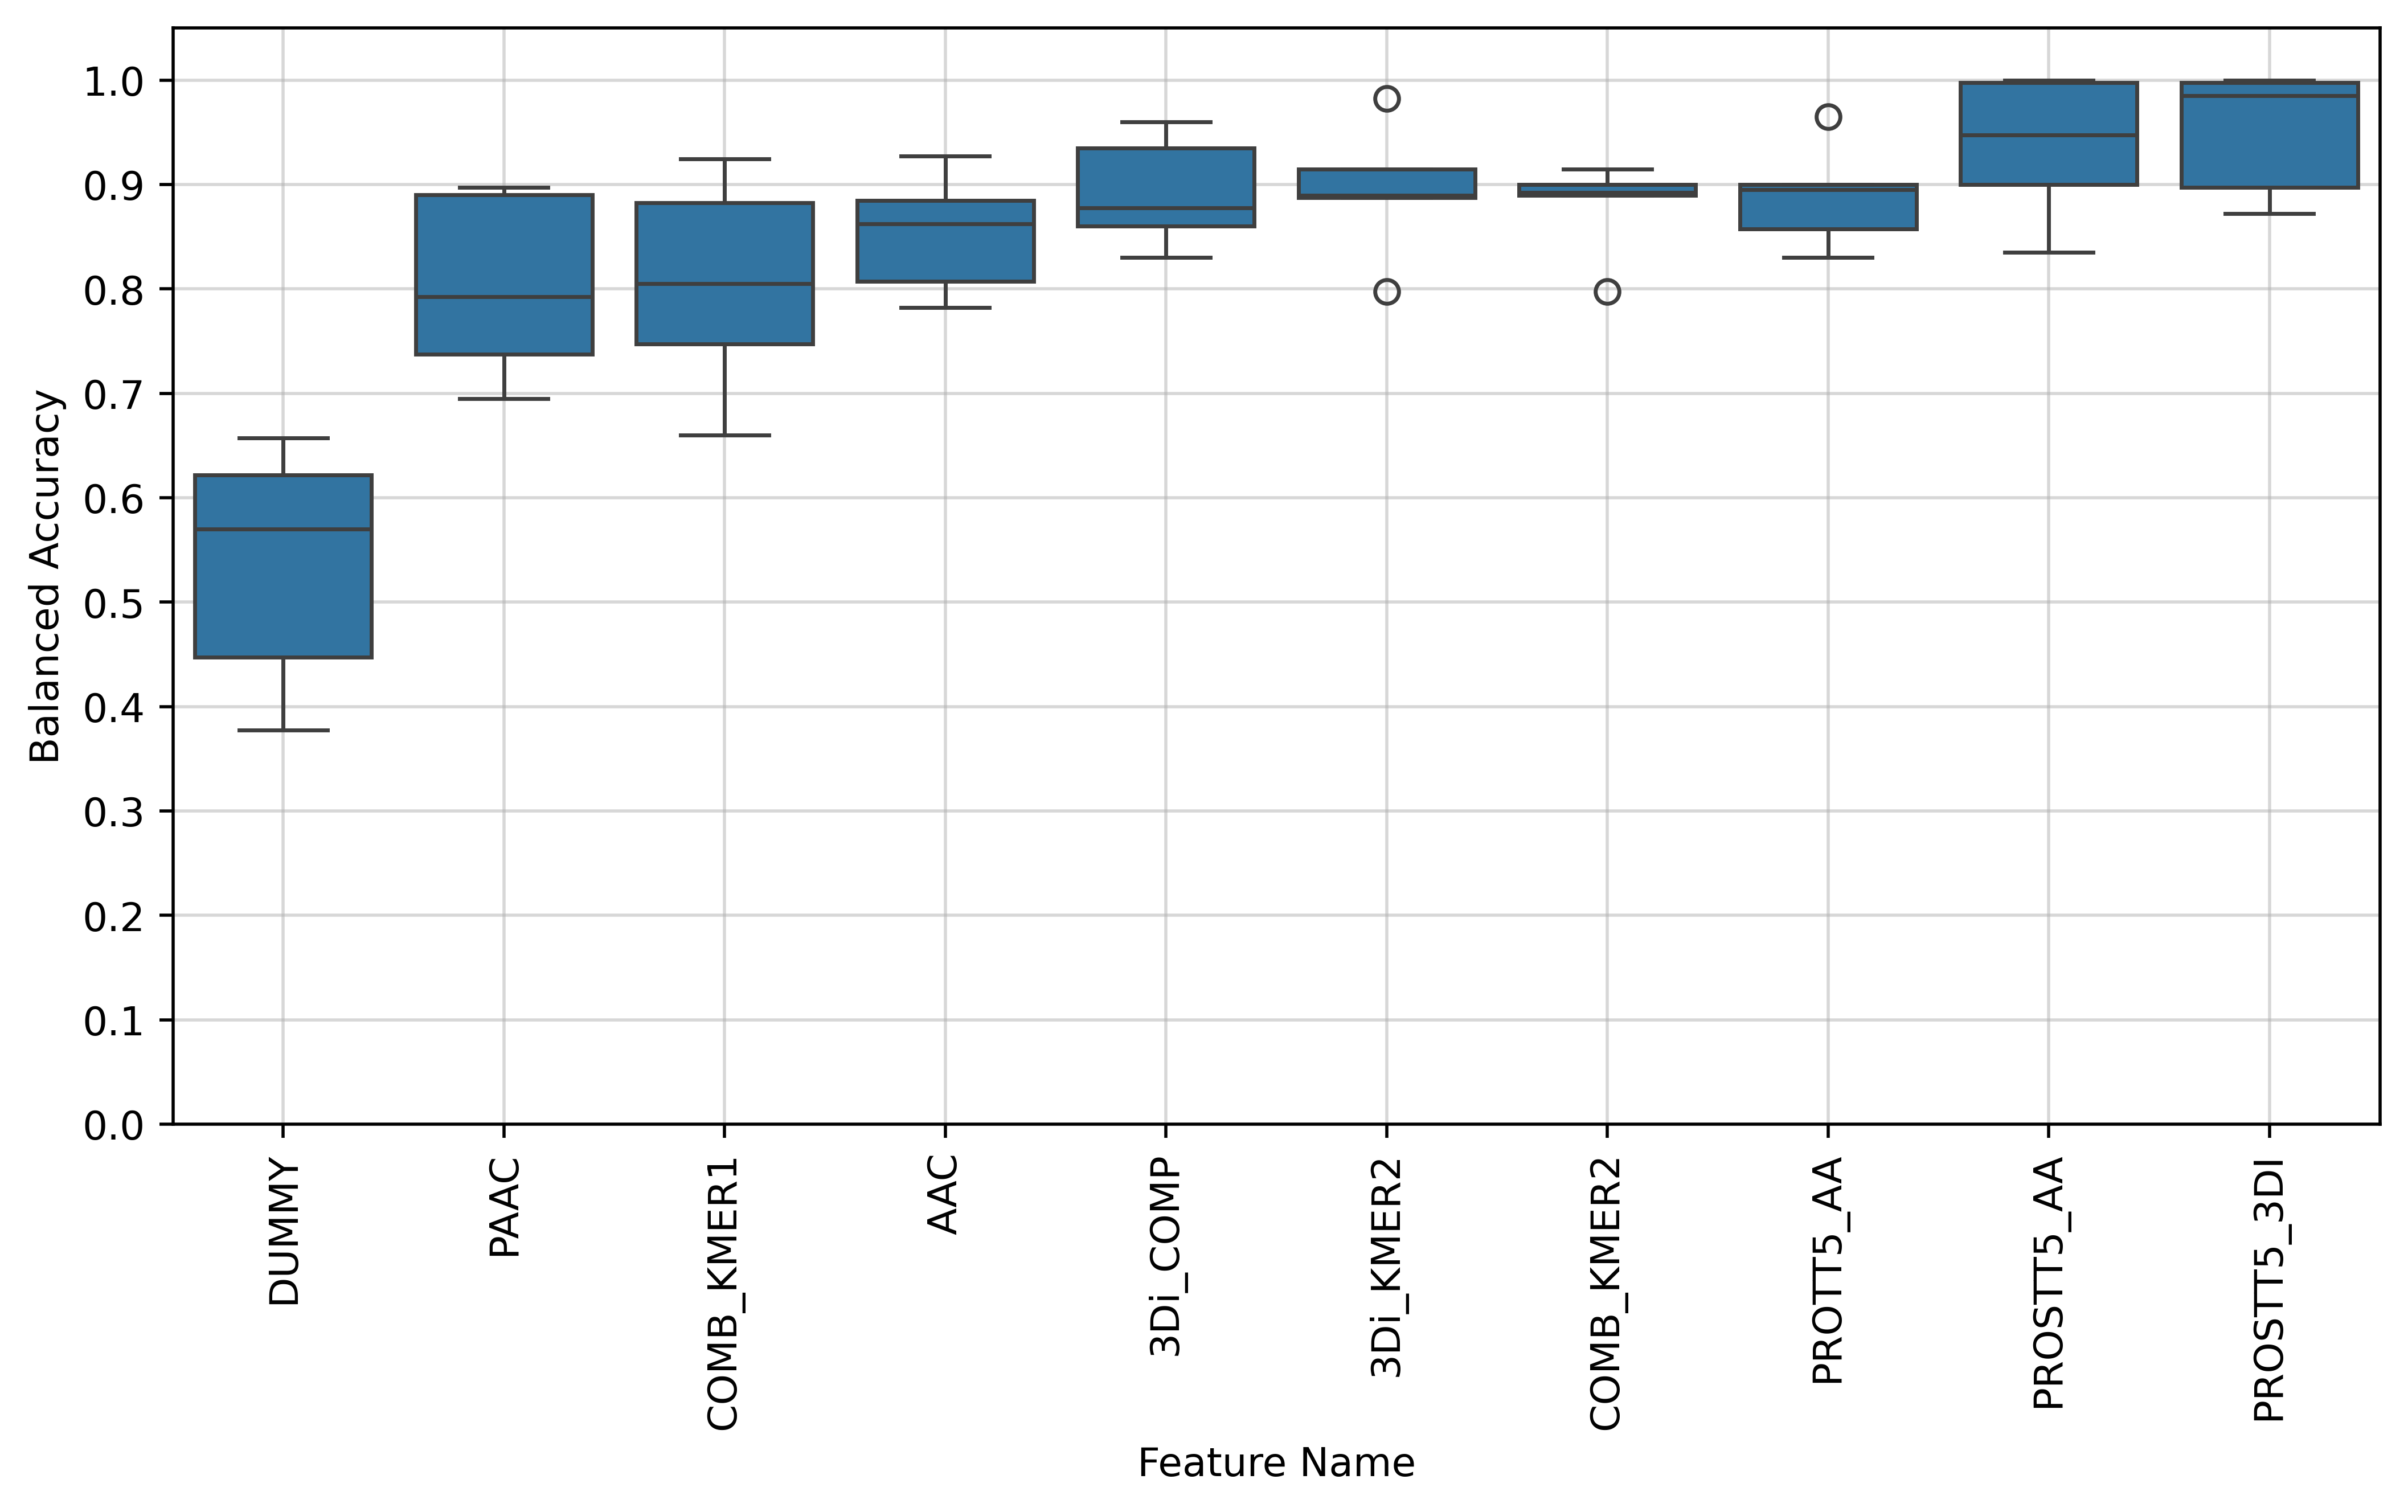

In [ ]:
from subpred.evaluation import get_svm_results, plot_results_long

RESULTS_FOLDER = "../data/results/"
TEST_NAME = "svc_human_sugar_ovr"
RECALCULATE = True
# TODO try recall

df_results_long = get_svm_results(
    ml_datasets=ml_datasets,
    recalculate=RECALCULATE,
    output_folder=RESULTS_FOLDER,
    test_name=TEST_NAME,
    repeats=1,
    n_jobs_inner=-1,
    n_jobs_outer=1
)
plot_results_long(
    df_results_long=df_results_long,
    output_folder_path=RESULTS_FOLDER,
    test_name=TEST_NAME,
)

In [31]:
# TODO other metrics, like one-sided recall?